In [2]:
import sys
sys.path.append("your path of measurement_tool_orion")
sys.path.append("your path of measurement_tool_orion_automation")
sys.path.append("your path of collision_checker")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import measurement_tool as mt
from measurement_tool.units import LabradUnit, GHz, MHz, kHz, dBm, dB, rad, ns, us
from measurement_tool import CalibrationNote
from collision_checker.collision import *
from collision_checker.check import get_collision, get_safe_lattice
from collision_checker.lattice import qubit_lattice, mux_lattice
from collision_checker.util import get_node_info
from collision_checker.visualize import visualize

In [4]:
def load_note(directory, node_list):
    qubit_notes = {}
    for i in node_list:
        try:
            qubit_name = f"Q{i}"
            att = pd.read_pickle(f"./calibration_notes/{directory}/CAL1/{qubit_name}_note.pickle")
            cal = CalibrationNote()
            cal.from_attribute_dict(att)
            qubit_notes[qubit_name] = cal
        except:
            pass
    return qubit_notes

In [5]:
note_directory = "your directory of calibration notes"
qubit_notes = load_note(note_directory, range(64))
node_info = get_node_info(range(64), qubit_notes)

In [8]:
condition = [Type0A(), Type0B(), Type1(), Type2A(), Type2B(), Type3(), Type7(), Type8(), Type9()]
nodes, edges, pos = qubit_lattice(n=64,d=4)
collision_info = get_collision(nodes, edges, node_info, condition)
safe_nodes, safe_edges = get_safe_lattice(nodes, edges, collision_info)

Type0A


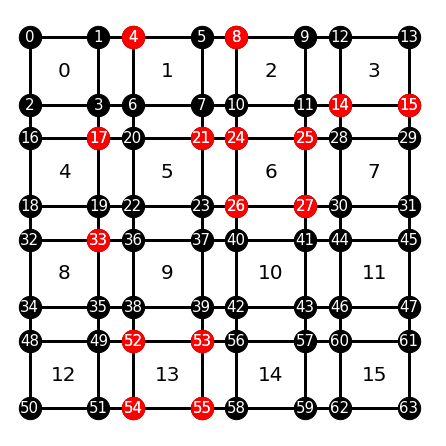

Type0B


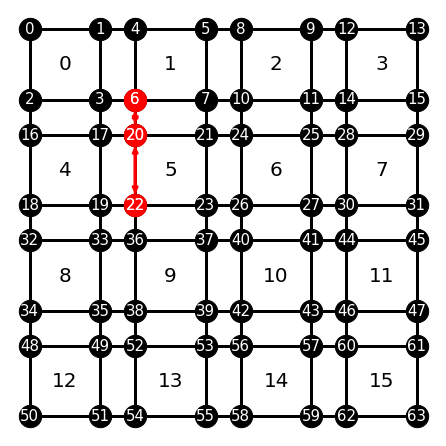

Type1


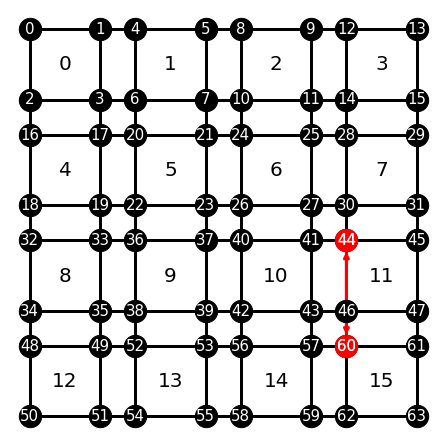

Type2A


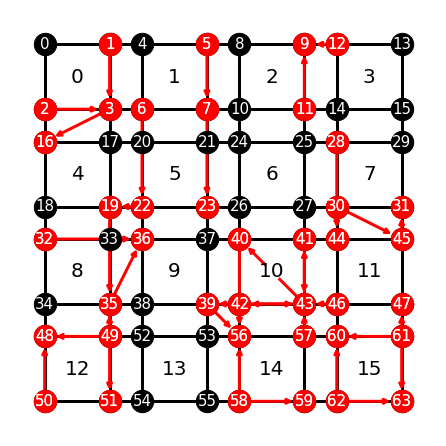

Type2B


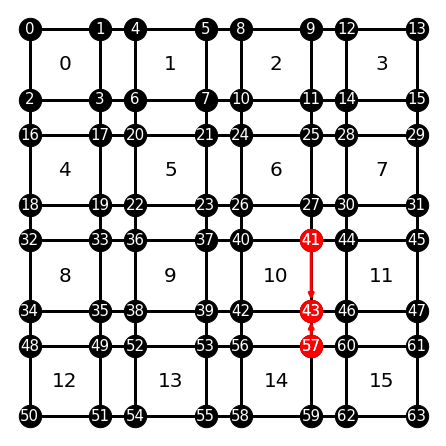

Type3


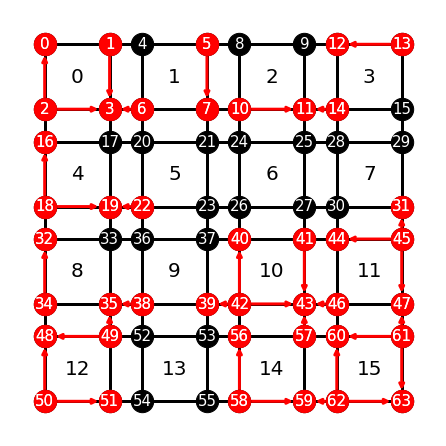

Type7


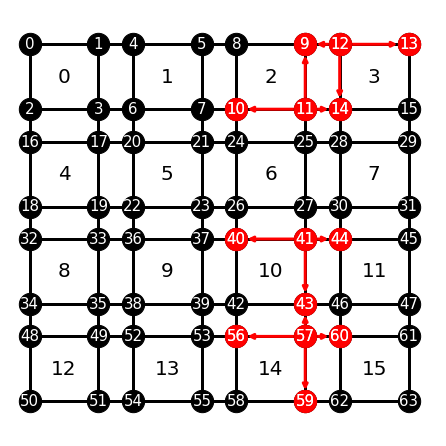

Type8


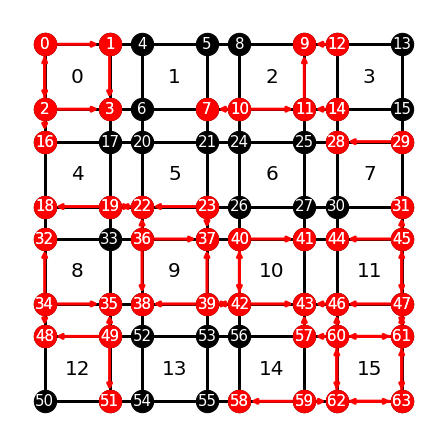

Type9


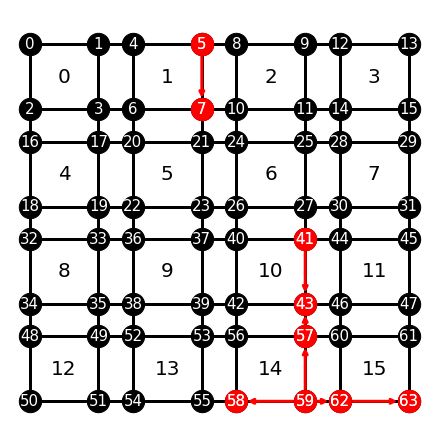

In [9]:
for key, val in collision_info.items():
    print(key)
    visualize(n=64, d=4, collisions=val)

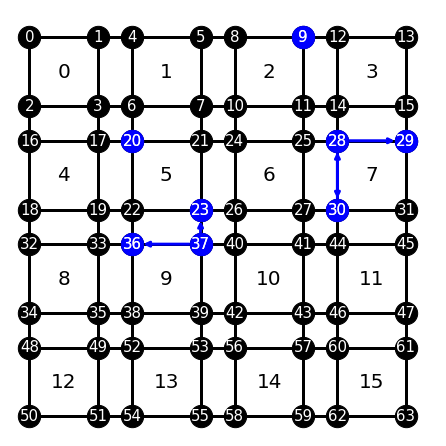

In [20]:
visualize(n=64, d=4, safe_nodes=safe_nodes, safe_edges=safe_edges)